# This lab plays with linear transformation. We will deal with transition matrix, and manipulating images with matrices.

Here we try tiling the plane with a bird image(From _When life is linear_ by Tim Chartier)

In [41]:
# import packages 
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.patches
from PIL import Image


<Figure size 432x288 with 0 Axes>

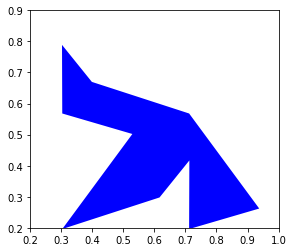

In [48]:
# make a basic bird polygon

fig = plt.figure()
points = [[0.3036, 0.1960], [0.6168, 0.2977], [0.7128, 0.4169], [0.7120, 0.1960],[0.9377,0.2620],\
          [0.7120,0.5680],[0.3989,0.6697],[0.3028,0.7889],[0.3036,0.5680],[0.5293,0.5020]]

bird = matplotlib.patches.Polygon(points, facecolor='blue')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(bird)

ax.set_xlim(0.2,1)
ax.set_ylim(0.2,0.9)
plt.show()

Manipulating the figure (reflection, translation,and rotation) is done thru matrix multiplication.

In [64]:
# rotate bird 180 degrees about the origin, first define rotation matrix  # point (0.7120,0.4320)

theta = np.pi
rotationMatrix = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    
rotationMatrix

array([[-1.0000000e+00, -1.2246468e-16],
       [ 1.2246468e-16, -1.0000000e+00]])

In [65]:
# rotate all points in original bird about the origin 
rotatepoints = []
for x in points:
    rotatepoints.append(np.dot(rotationMatrix,x))

<Figure size 432x288 with 0 Axes>

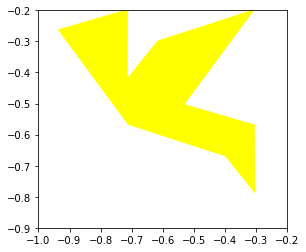

In [66]:
# Plot rotated bird

fig = plt.figure()

rotatebird = matplotlib.patches.Polygon(rotatepoints, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(rotatebird)

ax.set_xlim(-1,-0.2)
ax.set_ylim(-0.9,-0.2)
plt.show()

In [ ]:
# reflect with

In [83]:
# define shift vector

shift = (2*0.7120, 2*0.4320)


In [89]:
# shift rotated bird up
shiftpoints = []
for x in rotatepoints:
    shiftpoints.append(x+shift)
shiftpoints    

[array([1.1204, 0.668 ]),
 array([0.8072, 0.5663]),
 array([0.7112, 0.4471]),
 array([0.712, 0.668]),
 array([0.4863, 0.602 ]),
 array([0.712, 0.296]),
 array([1.0251, 0.1943]),
 array([1.1212, 0.0751]),
 array([1.1204, 0.296 ]),
 array([0.8947, 0.362 ])]

<Figure size 432x288 with 0 Axes>

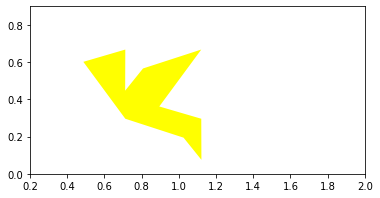

In [94]:
# Plot shifted bird

fig = plt.figure()

shiftbird = matplotlib.patches.Polygon(shiftpoints, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(shiftbird)

ax.set_xlim(0.2,2)
ax.set_ylim(0.0,0.9)
plt.show()

In [96]:
points+rotatepoints


[[0.3036, 0.196],
 [0.6168, 0.2977],
 [0.7128, 0.4169],
 [0.712, 0.196],
 [0.9377, 0.262],
 [0.712, 0.568],
 [0.3989, 0.6697],
 [0.3028, 0.7889],
 [0.3036, 0.568],
 [0.5293, 0.502],
 array([-0.3036, -0.196 ]),
 array([-0.6168, -0.2977]),
 array([-0.7128, -0.4169]),
 array([-0.712, -0.196]),
 array([-0.9377, -0.262 ]),
 array([-0.712, -0.568]),
 array([-0.3989, -0.6697]),
 array([-0.3028, -0.7889]),
 array([-0.3036, -0.568 ]),
 array([-0.5293, -0.502 ])]